In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import timeit
import time
import itertools as it
import matplotlib.animation as ani
from matplotlib import rc
from IPython.display import HTML
%matplotlib inline

54.8099154856 4.30483841781
[ 0.0001647   0.00020776  0.00026095  0.00032634  0.00040635  0.00050379
  0.00062188  0.00076433  0.00093533  0.00113965  0.00138257  0.00167002
  0.00200849  0.0024051   0.00286755  0.00340411  0.00402358  0.00473517
  0.00554848  0.00647332  0.00751961  0.00869718  0.0100156   0.01148393
  0.01311048  0.0149026   0.01686633  0.01900614  0.02132468  0.02382242
  0.02649747  0.02934526  0.03235835  0.0355263   0.03883546  0.04226901
  0.04580687  0.04942586  0.05309979  0.05679976  0.06049439  0.06415031
  0.06773255  0.07120511  0.0745315   0.07767542  0.08060135  0.08327528
  0.08566529  0.08774223  0.08948031  0.09085761  0.09185655  0.09246428
  0.09267292  0.09247977  0.09188733  0.09090328  0.08954029  0.08781576
  0.08575144  0.083373    0.08070946  0.07779263  0.07465648  0.07133646
  0.06786887  0.06429019  0.06063645  0.05694268  0.05324233  0.04956683
  0.04594522  0.04240378  0.03896581  0.03565151  0.03247784  0.02945855
  0.02660423  0.0239224

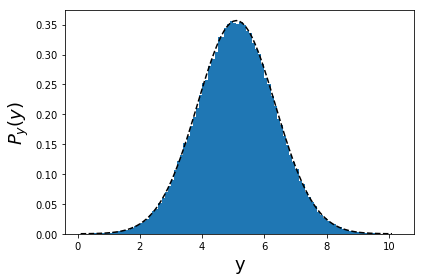

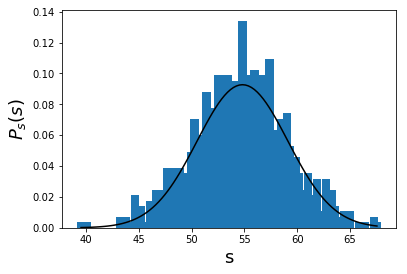

In [21]:
# =================== RANDOM NUMBER  GENERATION =========================

txt_data = open('gauss_data.txt', 'r')
i = []
bins = []
g_ana = []
hist = []

for indx in range(0,101):
    line = txt_data.readline()
    line = line[:-1]
    i.append(int(line[:12]))
    bins.append(float(line[12:29].replace(" ","")))
    g_ana.append(float(line[29:46].replace(" ","")))
    hist.append(int(float(line[46:].replace(" ",""))))

bins = np.asarray(bins)
hist = np.asarray(hist)
hist = hist * 0.35568 / np.amax(hist)

plt.figure(0)
plt.rc('axes', labelsize=18)
plt.bar(bins + 0.1, hist, width=0.1, align='edge')
plt.plot(bins ,g_ana, 'k--')
plt.xlabel('y')
plt.ylabel('$P_y(y)$')
plt.tight_layout()
plt.savefig('Gauss_Dist')


rand_sum = []
for indx in range(0,1000):
    line = txt_data.readline()
    line = line[:-1]
    rand_sum.append(float(line))

rand_sum = np.asarray(rand_sum)
hist_sum, bin_edges = np.histogram(rand_sum, bins=100)
#hist_sum = hist_sum * 0.09267 / np.amax(hist_sum)
hist_sum = hist_sum / np.trapz(hist_sum, dx = bin_edges[1] - bin_edges[0])
bin_edges = bin_edges[:-1]

plt.figure(1)
plt.bar(bin_edges, hist_sum)
print(np.mean(rand_sum), np.std(rand_sum))

g_vals = np.zeros_like(bin_edges)
for i in range(bin_edges.size):
    g_vals[i] = (1/np.sqrt(2*np.pi*np.std(rand_sum)**2))*np.exp(-(bin_edges[i] - np.mean(rand_sum))**2 / (2*np.std(rand_sum)**2))
plt.plot(bin_edges, g_vals, 'k')
plt.xlabel('s')
plt.ylabel('$P_s(s)$')
plt.savefig('Gauss_sum')
print(g_vals)

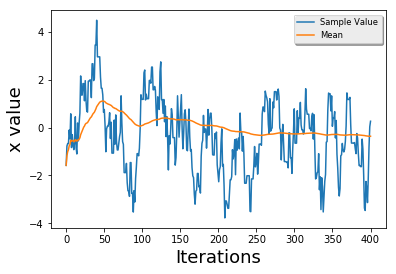

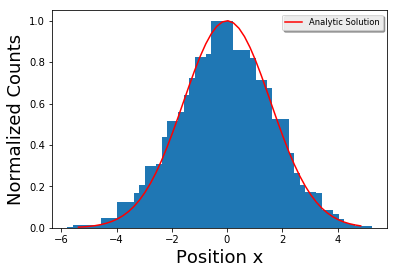

In [76]:
#=========================== MCMC TESTS ====================

txt_data = open('rand_walk.txt', 'r')
x = []
x_sum = []

for indx in range(0,5000):
    line = txt_data.readline()
    line = line[:-1]
    x.append(float(line[:17].replace(" ","")))
    x_sum.append(float(line[17:].replace(" ","")))
    
x = np.asarray(x)
x_sum = np.asarray(x_sum)

steps = np.linspace(0,400, 400)

plt.figure(0)
f, ax = plt.subplots()
ax.plot(steps, x[:400], label='Sample Value')
ax.plot(steps, x_sum[:400], label='Mean')
ax.set_xlabel('Iterations')
ax.set_ylabel('x value')
ax.legend(loc='upper right', shadow=True, fontsize='small')
f.savefig('MCMCmean')

bin_size = 0.2
num_bins = int(math.floor((np.amax(x) - np.amin(x)) / bin_size))
height, bins = np.histogram(x, num_bins)
bins = bins[:-1]
height = height/np.amax(height)

plt.figure(1)
f, ax = plt.subplots()
ax.bar(bins, height)
ax.plot(bins, np.exp(-0.2*bins**2), 'r', label='Analytic Solution')
ax.set_xlabel('Position x')
ax.set_ylabel('Normalized Counts')
ax.legend(loc='upper right', shadow=True, fontsize='small')
f.savefig('MCMChisto')

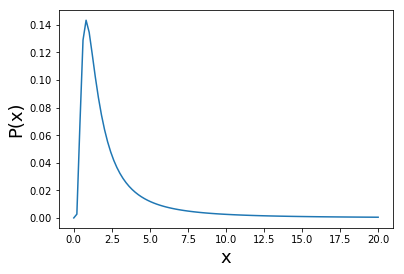

In [45]:
#=========================== Metropolis Hastings Chains =========================#

#What is the distribution we are looking to sample?
x = np.linspace(0.00001,20, 100)
y = x**(-5./2.) * np.exp(-2./x)

plt.figure(0)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.savefig('PDF')

txt_data = open('2chains.txt', 'r')
x_uniform = []
x_chi = []

for indx in range(0,500):
    line = txt_data.readline()
    line = line[:-1]
    x_uniform.append(float(line.replace(" ","")))

for indx in range(0,500):
    line = txt_data.readline()
    line = line[:-1]
    x_chi.append(float(line.replace(" ","")))
    
hist_uniform, bins_uniform = np.histogram(x_uniform, 250)
bins_uniform = bins_uniform[:-1]
hist_chi, bins_chi = np.histogram(x_chi, 100)
bins_chi = bins_chi[:-1]


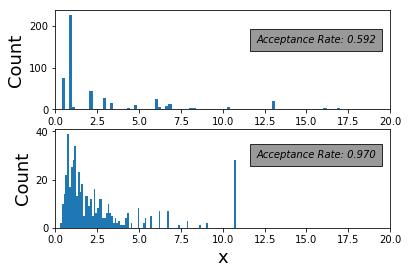

In [44]:
f, ax = plt.subplots(2, 1)
ax[0].bar(bins_uniform, hist_uniform, width=bins_uniform[1]-bins_uniform[0])
ax[0].set_xlabel('x')
ax[0].set_ylabel('Count')
ax[0].set_xlim(0,20)
ax[0].text(12, 160, 'Acceptance Rate: 0.592', style='italic', bbox={'facecolor':'grey', 'alpha':0.8, 'pad':6})


ax[1].bar(bins_chi, hist_chi, width=bins_chi[1]-bins_chi[0])
ax[1].set_xlabel('x')
ax[1].set_ylabel('Count')
ax[1].set_xlim(0,20)
ax[1].text(12, 29, 'Acceptance Rate: 0.970', style='italic', bbox={'facecolor':'grey', 'alpha':0.8, 'pad':6})
f.savefig('mixed_chains')


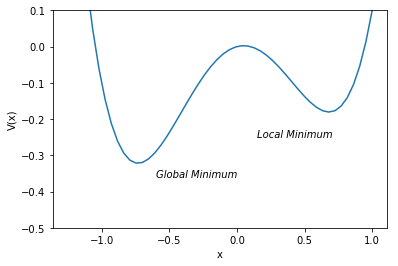

In [13]:
# ================================ SIMULATED ANNEALING

x = np.linspace(-1.25,1,50)
y = x**4 - x**2 + 0.1*x

plt.plot(x,y)
plt.ylim(-0.5, 0.1)
plt.text(-0.6, -0.36, 'Global Minimum', style='italic')
plt.text(0.15,-0.25, 'Local Minimum', style='italic')
plt.xlabel('x')
plt.ylabel('V(x)')
#plt.savefig('PotentialWell')

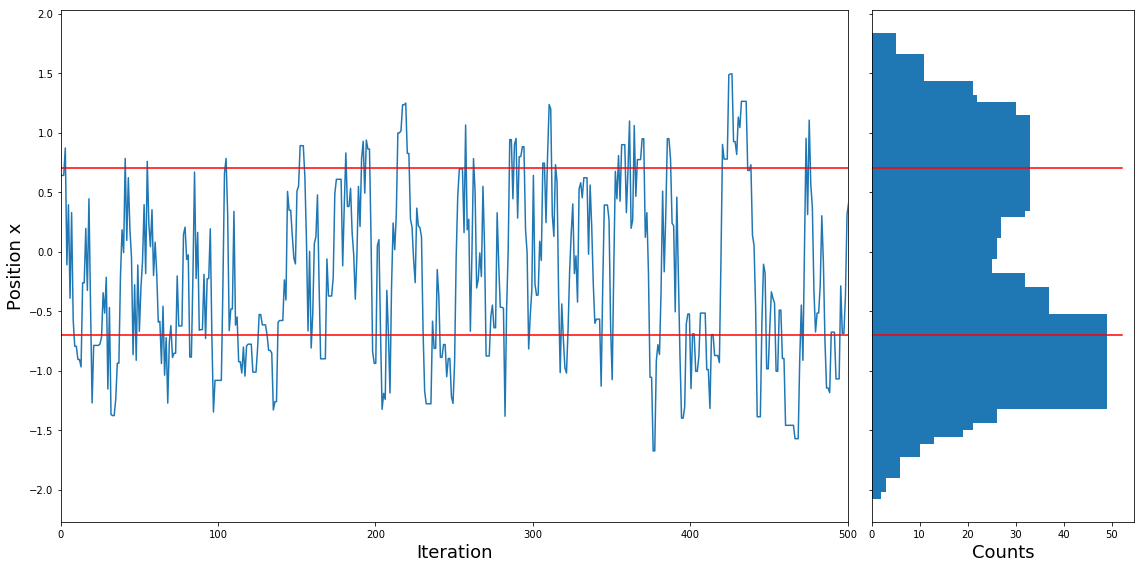

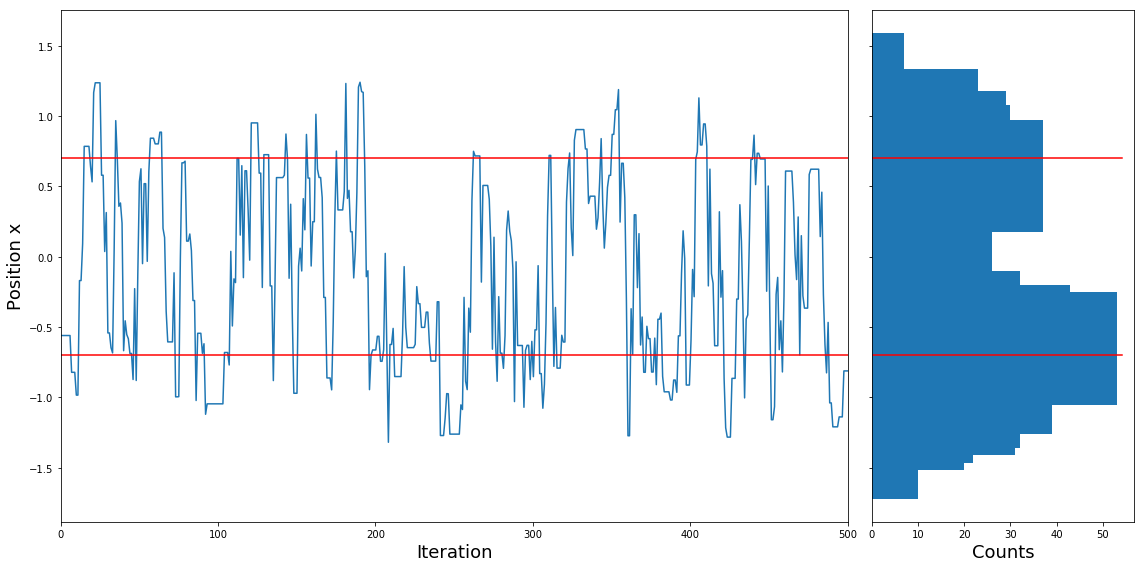

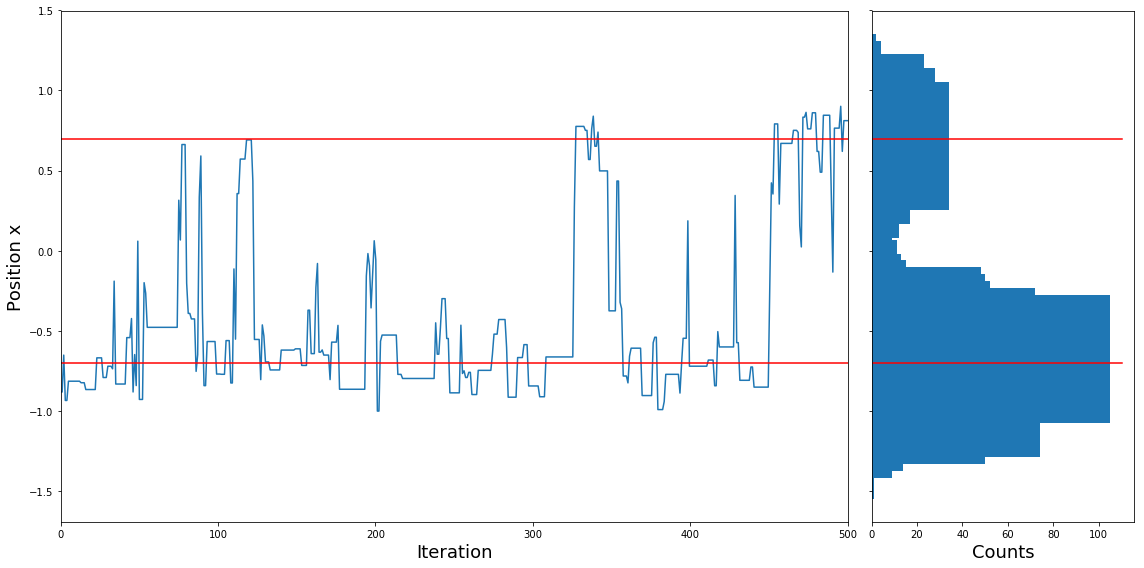

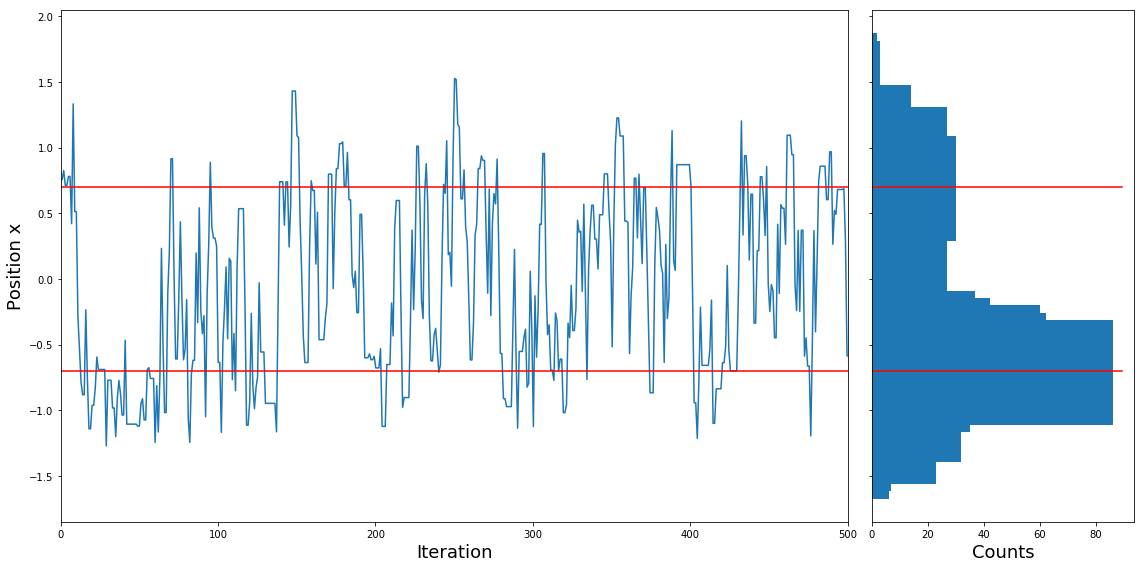

In [95]:
txt_data = open('well_anneal.txt', 'r')
x = []

# ++++++++++++ T = 1 ++++++++++++++++++++
for indx in range(0,1000):
    line = txt_data.readline()
    line = line[:-1]
    x.append(float(line[:17].replace(" ","")))
    
x = np.asarray(x)
t = np.linspace(0, x.size, x.size)
min1 = np.full_like(x, -0.7)
min2 = np.full_like(x, 0.7)

hist, bins = np.histogram(x, 55)
bins = bins[:-1]

fig, ax = plt.subplots(1,2,figsize=(16,8), gridspec_kw = {'width_ratios':[3, 1]}, sharey=True)
ax[0].plot(t, x, t, min1, 'r', t, min2, 'r')
ax[0].set_xlim(0,500)
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Position x')
ax[1].barh(bins, hist, align='center')
ax[1].plot(t[:53], min1[:53], 'r', t[:53], min2[:53], 'r')
ax[1].set_xlabel('Counts')
#ax[1].xlim(0,40)
fig.tight_layout()
fig.savefig('annealT1')

# ++++++++++++ T = 0.4 ++++++++++++++++++
x = []
for indx in range(0,1000):
    line = txt_data.readline()
    line = line[:-1]
    x.append(float(line[:17].replace(" ","")))
    
x = np.asarray(x)
t = np.linspace(0, x.size, x.size)
min1 = np.full_like(x, -0.7)
min2 = np.full_like(x, 0.7)

hist, bins = np.histogram(x, 50)
bins = bins[:-1]

fig, ax = plt.subplots(1,2,figsize=(16,8), gridspec_kw = {'width_ratios':[3, 1]}, sharey=True)
ax[0].plot(t, x, t, min1, 'r', t, min2, 'r')
ax[0].set_xlim(0,500)
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Position x')
ax[1].barh(bins, hist, align='center')
ax[1].plot(t[:55], min1[:55], 'r', t[:55], min2[:55], 'r')
ax[1].set_xlabel('Counts')
#ax[1].xlim(0,40)
fig.tight_layout()
fig.savefig('annealT04')

# ++++++++++++ T = 0.1 ++++++++++++++++++
x = []
for indx in range(0,1000):
    line = txt_data.readline()
    line = line[:-1]
    x.append(float(line[:17].replace(" ","")))
    
x = np.asarray(x)
t = np.linspace(0, x.size, x.size)
min1 = np.full_like(x, -0.7)
min2 = np.full_like(x, 0.7)

hist, bins = np.histogram(x, 50)
bins = bins[:-1]

fig, ax = plt.subplots(1,2,figsize=(16,8), gridspec_kw = {'width_ratios':[3, 1]}, sharey=True)
ax[0].plot(t, x, t, min1, 'r', t, min2, 'r')
ax[0].set_xlim(0,500)
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Position x')
ax[1].barh(bins, hist, align='center')
ax[1].plot(t[:111], min1[:111], 'r', t[:111], min2[:111], 'r')
ax[1].set_xlabel('Counts')
#ax[1].xlim(0,40)
fig.tight_layout()
fig.savefig('annealT01')

# ++++++++++++ Full T Regime ++++++++++++++++++
x = []
for indx in range(0,1000):
    line = txt_data.readline()
    line = line[:-1]
    x.append(float(line[:17].replace(" ","")))
    
x = np.asarray(x)
t = np.linspace(0, x.size, x.size)
min1 = np.full_like(x, -0.7)
min2 = np.full_like(x, 0.7)

hist, bins = np.histogram(x, 50)
bins = bins[:-1]

fig, ax = plt.subplots(1,2,figsize=(16,8), gridspec_kw = {'width_ratios':[3, 1]}, sharey=True)
ax[0].plot(t, x, t, min1, 'r', t, min2, 'r')
ax[0].set_xlim(0,500)
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Position x')
ax[1].barh(bins, hist, align='center')
ax[1].plot(t[:90], min1[:90], 'r', t[:90], min2[:90], 'r')
ax[1].set_xlabel('Counts')
#ax[1].xlim(0,40)
fig.tight_layout()
fig.savefig('anneal_full')

In [7]:
# ========== TRAVELING SALESMAN ===========================
#I'm not good enough at fortran to do it there, so python it is.

def route_dist(dist_matrix, route):
    """Determines the distance for a list of five cities
    INPUT:  dist_matrix = the distance between all cities in an array
            route       = the order to travel the cities
    RETURNS:dist        = the distance of the whole route"""
    dist = 0
    for k in range(4,0,-1):                                      #Determine the distance of the starting route
        dist = dist + dist_matrix[route[k], route[k-1]]
    return dist

#Do I need to run greedy for each starting city?
def greedy(dist_matrix, start):
    """Finds the best route by taking a starting city and finding the nearest 
    remaining city, then repeating
    INPUT: dist_matrix = an array containing the distances between all points
           start       = the city to start in
    OUTPUT:route       = the best route
           dist_best   = the shortest distance found"""
    current = start
    dist_best = 100
    best_city = start
    route = [start]
    all_routes = [route]
    
    for j in range(4):
        for i in range(5):                                          #Try each city
            if i not in route:                                      #If the city isn't currently in the route, find the distance to the current city
                temp_route = list(route)                            #Adds this test to the animation frames
                temp_route.append(i)
                all_routes.append(temp_route)
                
                dist_test = dist_matrix[current, i]
                if dist_test < dist_best:                           #Is it the best city remaining?
                    dist_best = dist_test
                    best_city = i
        route.append(best_city)
        current = best_city                                     #The new current city is the previous best, reset
        dist_best = 100
        
    dist_best = route_dist(dist_matrix, route)
    
    return route, dist_best, all_routes

def brute(dist_matrix):
    #Start with any route
    route = [0, 1, 2, 3, 4]
    dist = route_dist(dist_matrix, route)
    
    #Set the first route as the best route
    best_dist = dist
    best_route = route
    
    #For each pair of points, swap them to make a new route
    all_routes = it.permutations(route)
    
            #If the new route is shorter, it's the best
    for route_test in all_routes:
        dist = route_dist(dist_matrix, route_test)
        if dist < best_dist:
            best_route = route_test
            best_dist = dist
            
    return best_route, best_dist, all_routes

def neighbor(route):
    n_route = list(route)
    possible = [0, 1, 2, 3, 4]
    i = np.random.choice(possible)
    possible.remove(i)
    j = np.random.choice(possible)
    
    temp = n_route[i]
    n_route[i] = n_route[j]
    n_route[j] = temp
    
    return n_route

def flip(dist_matrix, proposal, route, t):
    p = np.exp( -(route_dist(dist_matrix, proposal) - route_dist(dist_matrix, route)) / t)
    u = np.random.random()
    if u < p:
        return True
    else:
        return False
    
def new_temp(t, i):
    t = t - 0.01 * i
    return t

def anneal(dist_matrix, t_start, num_steps):
    #Pick any route to start
    route = [0, 1, 2, 3, 4]
    all_routes = [route]
    
    #Set the first route as the best route
    best_dist = route_dist(dist_matrix, route)
    best_route = route
    
    t = t_start
    
    #Gather samples by 
    for i in range(num_steps):
        proposal = neighbor(route)
        all_routes.append(proposal)
        if route_dist(dist_matrix, proposal) < route_dist(dist_matrix, route):
            route = list(proposal)
            if route_dist(dist_matrix, proposal) < best_dist:
                best_route = list(route)
                best_dist = route_dist(dist_matrix, proposal)
        elif flip(dist_matrix, proposal, route, t):
            route = list(proposal)
        t = new_temp(t, i)
        
    return best_route, best_dist, all_routes

#================== ANIMATIONS =====================
#Constructed according to methods outlined in:
# http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

#Set up the figure
def fig_config():
    fig = plt.figure()
    ax = plt.axes(xlim=(-0.6, 1.5), ylim=(-0.5, 2))
    line, = ax.plot([], [], lw=2)
    ax.text(0.43, 1.64, '0', style='italic', bbox={'facecolor':'grey', 'alpha':0.8, 'pad':6})
    ax.text(-0.25,0.95, '1', style='italic', bbox={'facecolor':'grey', 'alpha':0.8, 'pad':6})
    ax.text(-0.1, -0.2, '2', style='italic', bbox={'facecolor':'grey', 'alpha':0.8, 'pad':6})
    ax.text(0.85,-0.2, '3', style='italic', bbox={'facecolor':'grey', 'alpha':0.8, 'pad':6})
    ax.text(1.05, 0.95, '4', style='italic', bbox={'facecolor':'grey', 'alpha':0.8, 'pad':6})
    
    return fig, ax, line
    
#Initialize the background
def init():
    line.set_data([], [])
    return line,

#Sets up the lines at each frame
def animate(route):
    x_points = [0.43, -0.15, 0, 0.85, 1,51]
    y_points = [1.54, 0.95, 0, 0, 0.95]
    
    #Put the city coordinates in order
    x = []
    y = []
    for i in route:
        x.append(x_points[i])
        y.append(y_points[i])
    x.append(x[0])
    y.append(y[0])
    line.set_data(x, y)
    return line,

[3, 0, 1, 4, 2] 16


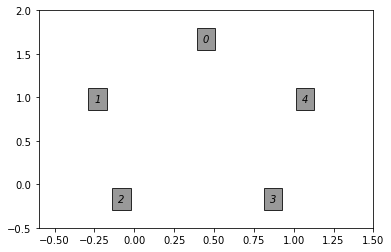

In [20]:
dist_matrix = [[0, 3, 4, 2, 7] ,
               [3, 0, 4, 6, 3] , 
               [4, 4, 0, 5, 8] , 
               [2, 6, 5, 0, 6] ,
               [7, 3, 8, 6, 0]]

dist_matrix = np.asarray(dist_matrix)

time_0 = time.time()
best_greedy, best_greedy_dist, greedy_routes = greedy(dist_matrix, start=3)
time_1 = time.time()

greedy_routes = iter(greedy_routes)

fig = plt.figure()
ax = plt.axes(xlim=(-0.6, 1.5), ylim=(-0.5, 2))
line, = ax.plot([], [], lw=2)
ax.text(0.43, 1.64, '0', style='italic', bbox={'facecolor':'grey', 'alpha':0.8, 'pad':6})
ax.text(-0.25,0.95, '1', style='italic', bbox={'facecolor':'grey', 'alpha':0.8, 'pad':6})
ax.text(-0.1, -0.2, '2', style='italic', bbox={'facecolor':'grey', 'alpha':0.8, 'pad':6})
ax.text(0.85,-0.2, '3', style='italic', bbox={'facecolor':'grey', 'alpha':0.8, 'pad':6})
ax.text(1.05, 0.95, '4', style='italic', bbox={'facecolor':'grey', 'alpha':0.8, 'pad':6})

anim = ani.FuncAnimation(fig, animate, init_func=init,
                               frames=greedy_routes, interval=1000, blit=True)

print(best_greedy, best_greedy_dist)

In [12]:
rc('animation', html='html5')
anim
#anim.save('greedy.mp4')

(2, 3, 0, 1, 4) 13 time: 0.0


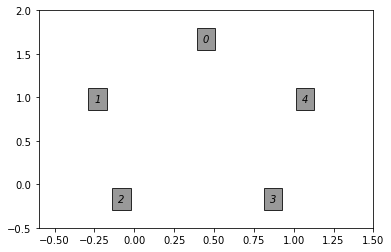

In [15]:
time_1 = time.time()
best_brute, best_brute_dist, brute_routes = brute(dist_matrix)
time_2 = time.time()

route = [0, 1, 2, 3, 4]

brute_routes = it.permutations(route)

fig, ax, line = fig_config()

anim = ani.FuncAnimation(fig, animate, init_func=init,
                               frames=brute_routes, interval=1000, blit=True)

print(best_brute, best_brute_dist, 'time:', time_1 - time_2)


In [16]:
rc('animation', html='html5')
anim

[[0, 1, 2, 3, 4], [3, 1, 2, 0, 4], [2, 1, 0, 3, 4], [4, 1, 0, 3, 2], [4, 3, 0, 1, 2], [3, 1, 0, 4, 2], [4, 1, 3, 0, 2], [4, 3, 0, 1, 2], [4, 1, 2, 3, 0], [4, 1, 0, 2, 3], [4, 1, 0, 2, 3], [4, 1, 2, 3, 0], [4, 1, 3, 0, 2], [4, 0, 1, 3, 2], [0, 1, 4, 3, 2], [4, 1, 3, 0, 2], [4, 1, 0, 2, 3], [4, 1, 2, 0, 3], [4, 1, 2, 3, 0], [4, 2, 1, 3, 0], [4, 2, 1, 0, 3], [4, 1, 2, 0, 3], [4, 2, 1, 0, 3], [4, 1, 2, 0, 3], [1, 4, 2, 0, 3], [1, 4, 2, 3, 0]]
[4, 1, 0, 3, 2] 13 time: -0.0010008811950683594


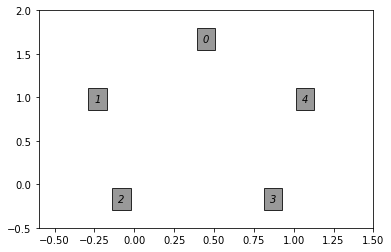

In [17]:
time_2 = time.time()
best_anneal, best_anneal_dist, anneal_routes = anneal(dist_matrix, t_start=1, num_steps=25)
time_3 = time.time()

print(anneal_routes)

anneal_routes = iter(anneal_routes)

fig_config()

anim = ani.FuncAnimation(fig, animate, init_func=init,
                               frames=anneal_routes, interval=1000, blit=True)
print(best_anneal, best_anneal_dist, 'time:', time_2 - time_3)


In [18]:
rc('animation', html='html5')
anim

In [ ]:
#Ask about animations - what does he want in the frames?
#Ask about how he wants to simulate the walker square
#Metropolis Hastings - are we still using the x + rand() thing?
#Simulated annealing - is the delta value preventing honing in?

In [28]:
timeit.timeit(lambda: greedy(dist_matrix, start=3), number=1000)

0.012525076453513861

In [29]:
timeit.timeit(lambda: brute(dist_matrix), number=1000)

0.21755991086018156

In [33]:
timeit.timeit(lambda: anneal(dist_matrix, t_start=1, num_steps=25), number=1000)

0.5960393422880941